# CAU EEG DATASET INITIAL PROCESSING (CHOPPING EYES OPEN)

Chop eyes closed data only

In [ ]:
import os
import json
import mne
import numpy as np

# Define paths
all_events_path = 'C:/Users/data_analysis/Downloads/caueeg/caueeg-dataset/event/' # These are json files with timestamps for eyes closed and open
all_signals_path = 'C:/Users/data_analysis/Downloads/caueeg/caueeg-dataset/signal/edf/' # These are the original signals with shape (channels, timepoints)
output_path = 'C:/Users/data_analysis/Downloads/caueeg/caueeg-dataset/signal/cau_eyes_closed/' # These are the epoched

# Ensure output path exists
os.makedirs(output_path, exist_ok=True)

# Function to process a single file pair
def process_file_pair(event_file, signal_file):
    # Load the JSON file
    with open(event_file, 'r') as f:
        events = json.load(f)

    # Extract "Eyes Closed" segments
    eyes_closed_segments = []
    is_eyes_closed = False
    start_time = 0
    sfreq = 200 

    for timestamp, event in events:
        if event == "Eyes Closed":
            start_time = timestamp/sfreq
            is_eyes_closed = True
        elif event == "Eyes Open" and is_eyes_closed:
            end_time = timestamp/sfreq
            eyes_closed_segments.append((start_time, end_time))
            is_eyes_closed = False

    # Load the EDF file
    raw = mne.io.read_raw_edf(signal_file, preload=True)


    # Extract "Eyes Closed" segments and concatenate them
    eyes_closed_data = []
    for start, end in eyes_closed_segments:
        # Events 00013.json has more timestamps than the 00013.edf total number of samples
        if end > raw.get_data().shape[1]/raw.info['sfreq']:
            pass
        else:
            segment = raw.copy().crop(tmin=start, tmax=end)  # Convert to seconds
            eyes_closed_data.append(segment)

    # Concatenate all eyes closed segments
    if eyes_closed_data:
        eyes_closed_raw = mne.concatenate_raws(eyes_closed_data)

        # Modify channel names and drop suffix "-AVG"
        eyes_closed_raw.rename_channels({ch: ch.replace('-AVG', '') for ch in eyes_closed_raw.ch_names})
        #eyes_closed_raw.drop_channels(['EKG', 'Photic'])
        # Reset meas_date to avoid the RuntimeError
        eyes_closed_raw.set_meas_date(None)
        # Generate output file path
        base_name = os.path.basename(signal_file).replace('.edf', '_eyesClosed.fif')
        output_file = os.path.join(output_path, base_name)

        # Save the concatenated segments to a new FIF file
        eyes_closed_raw.save(output_file, overwrite=True)

# Iterate over all files and process
for event_file in os.listdir(all_events_path):
    if event_file.endswith('.json'):
        signal_file = event_file.replace('.json', '.edf')
        event_file_path = os.path.join(all_events_path, event_file)
        signal_file_path = os.path.join(all_signals_path, signal_file)
        
        if os.path.exists(signal_file_path):
            process_file_pair(event_file_path, signal_file_path)


# PSD visualization

Extracting EDF parameters from D:\eeg_datasets\raw\caueeg\signal\edf\00001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 145599  =      0.000 ...   727.995 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


c:\Users\sesam_analysis\anaconda3\envs\green\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


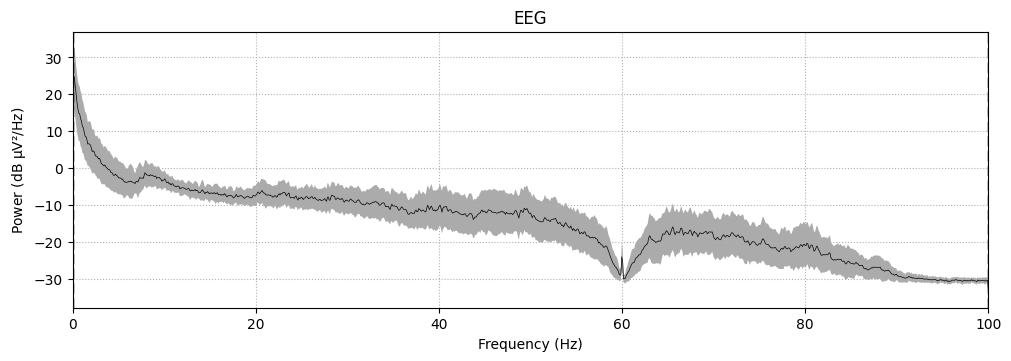

In [9]:
import mne
path = 'D:/eeg_datasets/raw/caueeg/signal/edf/00001.edf'
raw = mne.io.read_raw(path, preload = True)
raw.drop_channels(['EKG', 'Photic'])
raw.plot_psd(average=True)

Opening raw data file D:/eeg_datasets/raw/caueeg/signal/cau_eyes_closed/00001_eyesClosed.fif...
Isotrak not found
    Range : 72518 ... 127235 =    362.590 ...   636.175 secs
Ready.
Reading 0 ... 54717  =      0.000 ...   273.585 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


C:\Users\sesam_analysis\AppData\Local\Temp\ipykernel_35184\2514839565.py:3: RuntimeWarning: This filename (D:/eeg_datasets/raw/caueeg/signal/cau_eyes_closed/00001_eyesClosed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw(path, preload = True)
c:\Users\sesam_analysis\anaconda3\envs\green\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


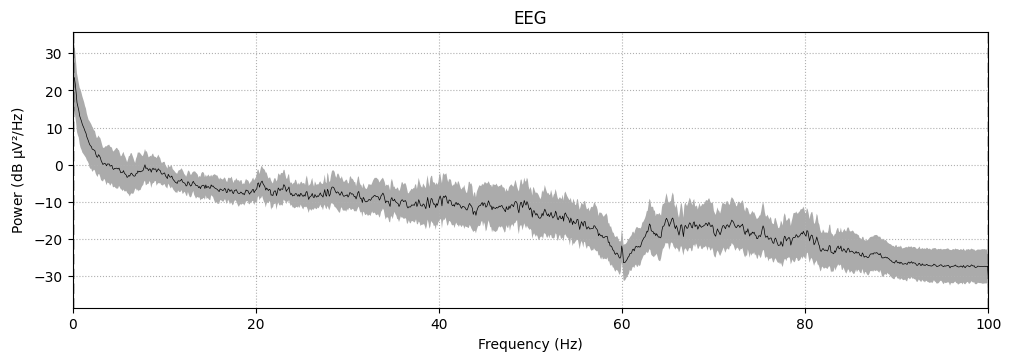

In [11]:
import mne
path = 'D:/eeg_datasets/raw/caueeg/signal/cau_eyes_closed/00001_eyesClosed.fif'
raw = mne.io.read_raw(path, preload = True)
raw.drop_channels(['EKG', 'Photic'])
raw.plot_psd(average= True)